## No.1 Seaborn 和 Matplotlib 对比

用经典的鸢尾花的数据为例子，来对比一下 seaborn 和 matplotlib

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

In [43]:
iris = pd.read_csv('https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv')

In [44]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<!-- TEASER_END -->

然后里面的 Name 一共有 3 个，3 个种类。

In [45]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
iris_groupby = iris.groupby(iris['Name'])

In [47]:
iris_groupby.get_group('Iris-setosa')[:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
iris_groupby.get_group('Iris-versicolor')[:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


然后下面用 matplotlib 画图。

In [49]:
color_map = dict(zip(iris.Name.unique(), ['blue', 'green', 'red']))

In [50]:
color_map

{'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

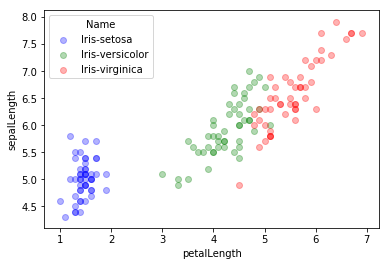

In [51]:
for species, group in iris.groupby('Name'):
    plt.scatter(group['PetalLength'], group['SepalLength'],
               color=color_map[species],
               alpha=0.3, edgecolor=None,
               label=species)
plt.legend(frameon=True, title='Name')
plt.xlabel('petalLength')
plt.ylabel('sepalLength')
plt.show()

图中三种颜色表示三种类型的花，SepalLength 表示萼片长度，PetalLength 表示花瓣长度。

有没有发现代码好长啊，而且容易出错。再看看 seaborn。

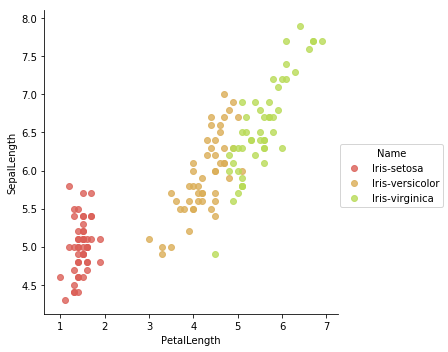

In [52]:
sns.lmplot('PetalLength', 'SepalLength', iris, hue='Name', fit_reg=False)
plt.show()

一行代码……有没有一种呵呵哒的感觉？这差距也太大了。

## No.2 Seaborn 直方图和密度图

首先回顾一下 matplotlib 画直方图密度图。

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

In [54]:
s1 = Series(np.random.randn(1000))

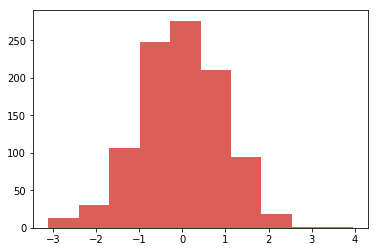

In [55]:
plt.hist(s1)
plt.show()

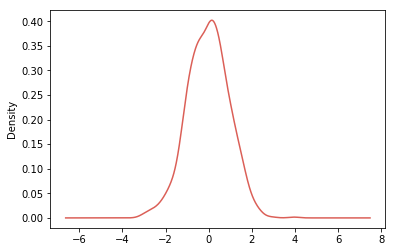

In [56]:
s1.plot(kind='kde')
plt.show()

再看看 seaborn 是怎么画的。

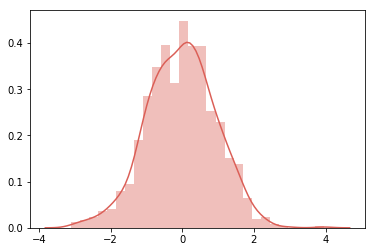

In [57]:
sns.distplot(s1, hist=True, kde=True)
plt.show()

人家把两个图结合到一起来当然也可以改的。

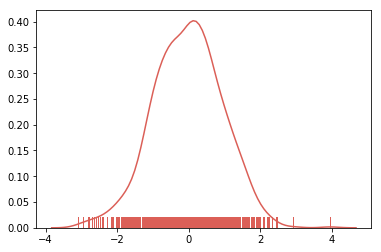

In [58]:
sns.distplot(s1, hist=False, kde=True, rug=True)
plt.show()

下面加了一层，表示分布情况。还可以添加 bins 来切割直方图。

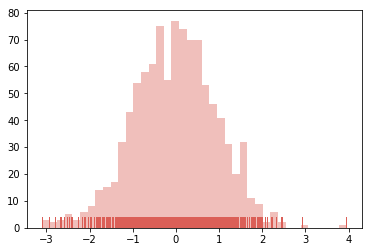

In [59]:
sns.distplot(s1, bins=40, hist=True, kde=False, rug=True)
plt.show()

还可以填充密度图。

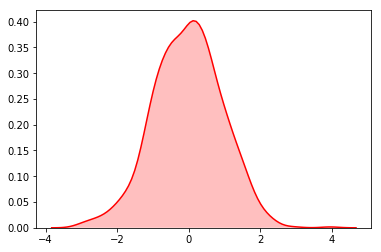

In [60]:
sns.kdeplot(s1, shade=True, color='r')
plt.show()

## No.3 Seaborn 柱状图和热力图

首先使用 seaborn 的 load_dataset 方法来加载在线数据，这个如何实现可以去看 GitHub 的源码，源码里面提供了很多 csv 文件的数据集。

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

In [62]:
df = sns.load_dataset('flights')

In [63]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [64]:
df.shape

(144, 3)

这是个飞行数据，下面做一个透视表出来。

In [65]:
df = df.pivot(index='month', columns='year', values='passengers')

In [66]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


根据这个透视表做一个热力图，查看每年飞行次数。

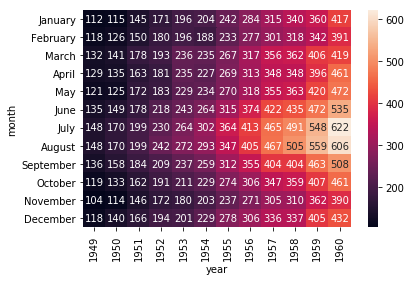

In [67]:
sns.heatmap(df, annot=True, fmt='d')
plt.show()

这张热力图能看出来 49 年到 60 年飞行次数逐步增加，并且每年飞行次数多集中于中间月份，也就是 5 月到 9 月。

然后再画一个柱状图，柱状图就比较简单了。

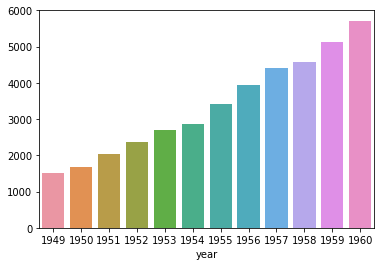

In [68]:
sns.barplot(x=df.sum().index, y=df.sum().values)
plt.show()

这是每一年飞行次数的综合画的柱状图。

## No.4 Seaborn 强大的调色功能

首先写一个固定的绘图函数。

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

In [70]:
def sinplot():
    x = np.linspace(0, 14, 100)
    plt.figure(figsize=(8, 6))
    for i in range(4):
        plt.plot(x, np.sin(x+i)*(i+0.75), label='sin(x+%s)*(%s+0.75)' %(i,i))
    plt.legend()    
    plt.show()


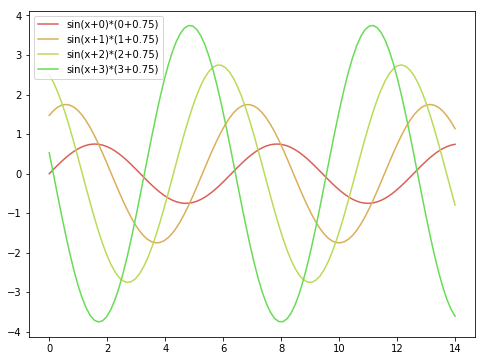

In [71]:
sinplot()

seaborn 内置了一个调色盘，六个颜色，有不同主题。

In [72]:
sns.color_palette() # RGB

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

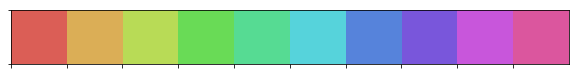

In [73]:
sns.palplot(sns.color_palette())
plt.show()

In [74]:
pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

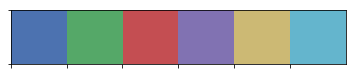

In [75]:
sns.palplot(sns.color_palette('deep'))
plt.show()

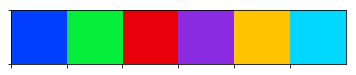

In [76]:
sns.palplot(sns.color_palette('bright'))
plt.show()

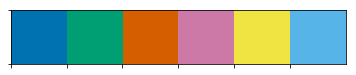

In [77]:
sns.palplot(sns.color_palette('colorblind'))
plt.show()

更换默认主题。

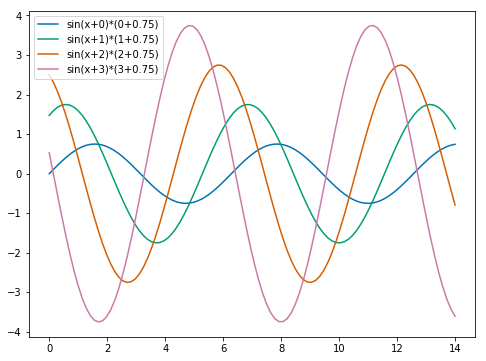

In [78]:
sns.set_palette(sns.color_palette('colorblind'))
sinplot()

图中线的颜色变了。你也可以自己设置颜色。

In [79]:
pal_1 = sns.color_palette([(0.5, 0.1, 0.7),
                          (0.3, 0.1, 0.9),
                          (0.7, 0.4, 0.2)])

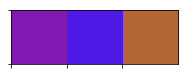

In [80]:
sns.palplot(pal_1)
plt.show()

但是这种方法太慢了，还要自己敲数字，seaborn 还有一个更便捷的方法。

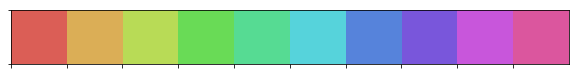

In [81]:
pal_2 = sns.color_palette('hls', 10)
sns.palplot(pal_2)
plt.show()

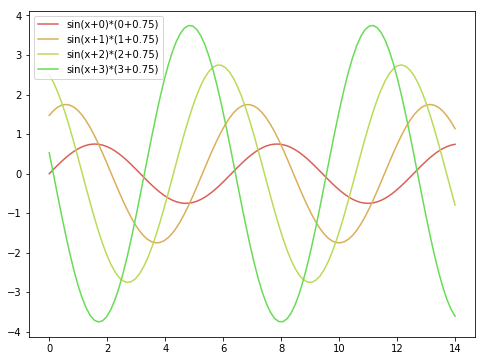

In [82]:
sns.set_palette(pal_2)
sinplot()

一行代码就可以了。

--------------------------------------------------

结束。